In [4]:

from constraint import Problem, AllDifferentConstraint

# Create a problem instance
problem = Problem()

# Define variables
events = ['E1', 'E2', 'E3', 'E4']
time_slots = ['T1', 'T2', 'T3', 'T4']
speakers = ['S1', 'S2', 'S3', 'S4']

# Domains for events: each event can be assigned to any time slot
for event in events:
    problem.addVariable(event, time_slots)

# Domains for speakers: each speaker can speak at any event
for speaker in speakers:
    problem.addVariable(speaker, events)

# Define the constraints

# 1. Event E1 must be assigned to T1
problem.addConstraint(lambda E1: E1 == 'T1', ('E1',))

# 2. Speaker S2  scheduled at a time T2
problem.addConstraint(lambda S2: S2 == 'T2', ('S2',))

# 3. Events E2 and E3 must not be scheduled at the same time
problem.addConstraint(lambda E2, E3: E2 != E3, ('E2', 'E3'))

# 4.No speaker can be assigned to more than one event at the same time
def no_time_conflict(*assignments):
    time_slots_assigned = [time for assignment in assignments for time in assignment]
    return len(time_slots_assigned) == len(set(time_slots_assigned))

problem.addConstraint(no_time_conflict, speakers)

# 5. Each speaker must speak at exactly one event
def speaker_to_event(*assignments):
    return len(set(assignments)) == len(assignments)

problem.addConstraint(speaker_to_event, speakers)

# Solve the problem
solutions = problem.getSolutions()

# Print the solutions
for solution in solutions:
    print("Solution:")
    for event in events:
        print(f"{event} is assigned to time slot {solution[event]}")
    for speaker in speakers:
        print(f"{speaker} is assigned to event {solution[speaker]}")
    print()


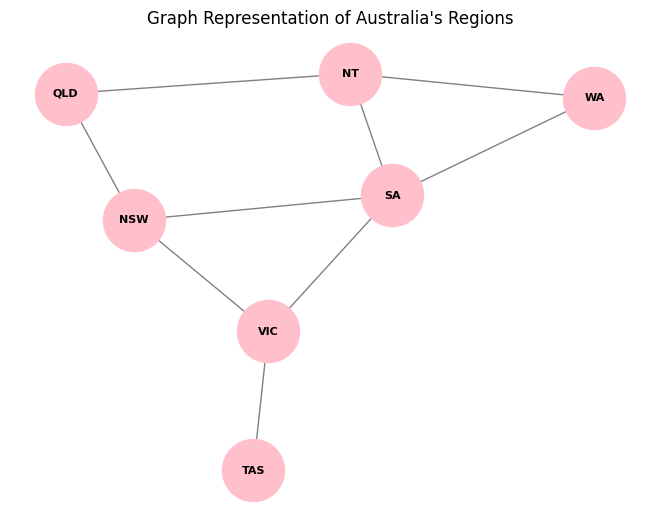

NSW: Color 1
VIC: Color 2
QLD: Color 2
SA: Color 3
WA: Color 2
NT: Color 1
TAS: Color 1


In [12]:
import networkx as nx
import matplotlib.pyplot as plt

# Define adjacency list for the map of Australia
adjacency = {
    'NSW': ['QLD', 'VIC', 'SA'],
    'VIC': ['NSW', 'SA', 'TAS'],
    'QLD': ['NSW', 'NT'],
    'SA': ['NSW', 'VIC', 'WA', 'NT'],
    'WA': ['SA', 'NT'],
    'NT': ['QLD', 'SA', 'WA'],
    'TAS': ['VIC']
}

# Create graph
G = nx.Graph(adjacency)

# Draw the graph
nx.draw(G, with_labels=True,node_size=2000, node_color="pink", font_size=8, font_weight="bold", edge_color="gray")
plt.title("Graph Representation of Australia's Regions")
plt.show()

# Function to check if the color assignment is valid for a region
def is_safe(region, color_assignment, color):
    return all(color_assignment.get(neighbor) != color for neighbor in adjacency[region])

# Backtracking to solve the coloring problem
def solve_coloring(region_index, color_assignment, regions):
    if region_index == len(regions):  # All regions are colored
        return True

    region = regions[region_index]

    for color in range(1, 4):  # Try using 3 colors (1, 2, 3)
        if is_safe(region, color_assignment, color):
            color_assignment[region] = color  # Assign color
            if solve_coloring(region_index + 1, color_assignment, regions):  # Recurse
                return True
            del color_assignment[region]  # Backtrack

    return False

# Start coloring
def color_map():
    regions = list(adjacency.keys())  # List of regions
    color_assignment = {}

    if solve_coloring(0, color_assignment, regions):
        for region in regions:
            print(f"{region}: Color {color_assignment[region]}")
    else:
        print("No solution found!")

# Run the coloring algorithm
color_map()
